# Initial setup

## Init data frame

In [1]:
!rm -rf /content/graph-edge-anomaly-detection/

In [2]:
!git clone https://github.com/MKasaei00/graph-edge-anomaly-detection.git

Cloning into 'graph-edge-anomaly-detection'...
remote: Enumerating objects: 273, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 273 (delta 12), reused 26 (delta 8), pack-reused 235 (from 1)
Receiving objects: 100% (273/273), 66.54 MiB | 9.39 MiB/s, done.
Resolving deltas: 100% (129/129), done.
Updating files: 100% (56/56), done.


In [3]:
!cd /content/graph-edge-anomaly-detection/datasets/DARPA/

In [4]:
# prompt: unrar file named meta.rar

!unrar x /content/graph-edge-anomaly-detection/datasets/DARPA/meta.rar /content/graph-edge-anomaly-detection/datasets/DARPA/
!unrar x /content/graph-edge-anomaly-detection/datasets/ISCX/meta.rar /content/graph-edge-anomaly-detection/datasets/ISCX/



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/graph-edge-anomaly-detection/datasets/DARPA/meta.rar

Extracting  /content/graph-edge-anomaly-detection/datasets/DARPA/merged_data.csv      21% 42% 63% 85%100%  OK 
All OK

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/graph-edge-anomaly-detection/datasets/ISCX/meta.rar

Extracting  /content/graph-edge-anomaly-detection/datasets/ISCX/merged_data.csv      72%100%  OK 
All OK


In [5]:
# prompt: import panda numpy and any library you might need

import pandas as pd
import numpy as np
from sklearn.metrics import f1_score

In [6]:
# prompt: create a df from csv file named mereged_data.csv

df = pd.read_csv('/content/graph-edge-anomaly-detection/datasets/DARPA/merged_data.csv')
print(df.head())

   score  label  min  q1  median  q3  max  sum
0    1.0      0    0   0       0   0    1    2
1    2.0      0    0   0       0   0    2    4
2    1.0      0    0   0       0   0    1    5
3    2.0      0    0   0       0   0    2    7
4    1.0      0    0   0       0   0    1    8


In [7]:
# prompt: create a df from csv file named mereged_data.csv

df2 = pd.read_csv('/content/graph-edge-anomaly-detection/datasets/ISCX/merged_data.csv')
print(df2.head())

    score  label  min  q1  median  q3  max  sum
0  1.0000      1    0   0       0   0    1    1
1  1.0000      0    0   0       0   0    1    1
2  1.0000      0    0   0       0   0    1    2
3  1.2226      0    0   0       0   0    1    3
4  1.5756      0    0   0       0   0    1    4


## Constant threshold for DARPA


In [ ]:
# prompt: This dataframe contains values I want to add a new column based on existing columns , name this column generated_threshold_value
# and after that I want to calculate a new column named generated_label (if score is greater than or equal to generated_threshold_value label will be 1 otherwise it will be  zero)
# after that calculate f1 score based on generated_label and label column

# Assuming df is already defined from the previous code

# Calculate the generated_threshold_value (example: constant value of 500)
df['generated_threshold_value'] = 500

# Generate labels based on the threshold
df['generated_label'] = np.where(df['score'] >= df['generated_threshold_value'], 1, 0)

# Calculate the F1-score
f1 = f1_score(df['label'], df['generated_label'])
print(f"F1 Score: {f1}")

F1 Score: 0.9300713612916923


Threshold value : 0
Threshold value : 100
Threshold value : 200
Threshold value : 300
Threshold value : 400
Threshold value : 500
Threshold value : 600
Threshold value : 700
Threshold value : 800
Threshold value : 900
Threshold value : 1000


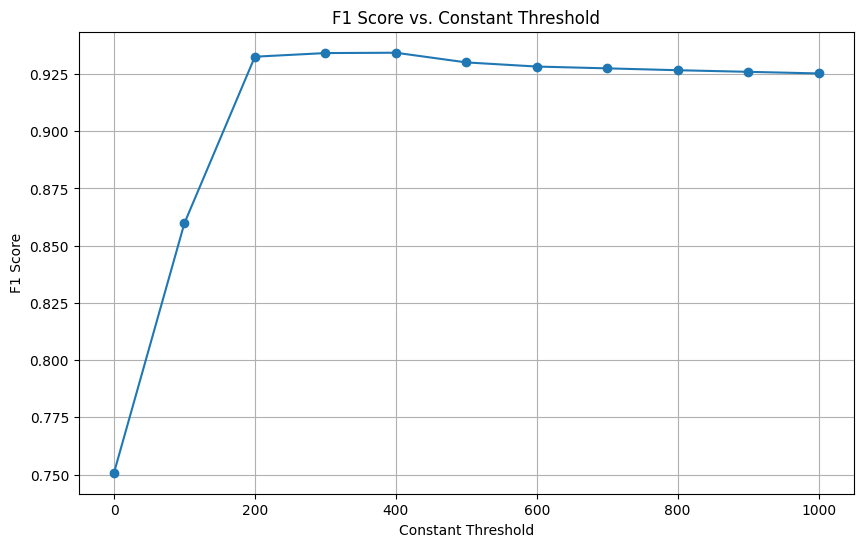

In [ ]:
# prompt: draw a diagram that changes values of constant threshold between 0 and 1000 and f1 score on y axis

import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# ... (your existing code to load and preprocess the data) ...

f1_scores = []
thresholds = []

for threshold in range(0, 1001, 100):
    df['generated_threshold_value'] = threshold
    df['generated_label'] = np.where(df['score'] >= df['generated_threshold_value'], 1, 0)
    f1 = f1_score(df['label'], df['generated_label'], zero_division=1) #Handle cases where true positives and false positives are zero
    print(f"Threshold value : {threshold}")
    f1_scores.append(f1)
    thresholds.append(threshold)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-')
plt.xlabel("Constant Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. Constant Threshold")
plt.grid(True)
plt.show()


Threshold value : 100
Threshold value : 150
Threshold value : 200
Threshold value : 250
Threshold value : 300
Threshold value : 350
Threshold value : 400
Threshold value : 450
Threshold value : 500
Threshold value : 550
Threshold value : 600


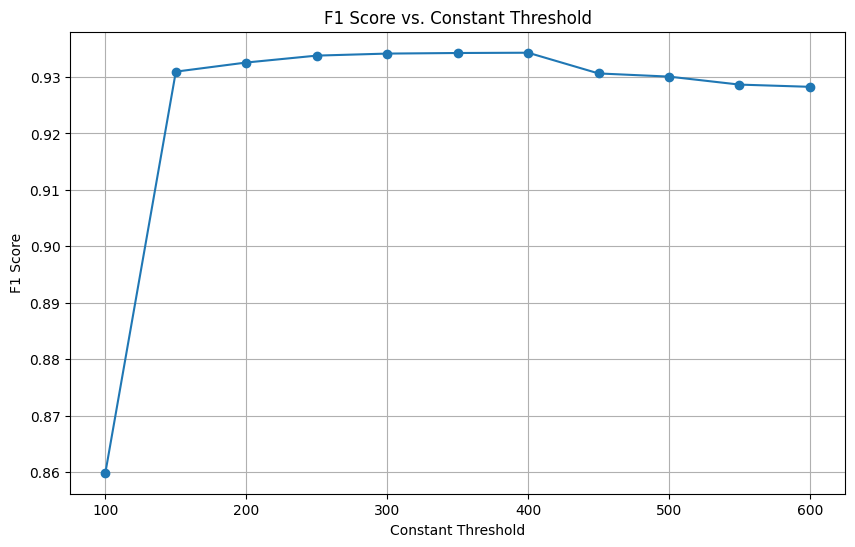

In [ ]:
# prompt: draw a diagram that changes values of constant threshold between 0 and 1000 and f1 score on y axis

import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# ... (your existing code to load and preprocess the data) ...

f1_scores = []
thresholds = []

for threshold in range(100, 601, 50):
    df['generated_threshold_value'] = threshold
    df['generated_label'] = np.where(df['score'] >= df['generated_threshold_value'], 1, 0)
    f1 = f1_score(df['label'], df['generated_label'], zero_division=1) #Handle cases where true positives and false positives are zero
    print(f"Threshold value : {threshold}")
    f1_scores.append(f1)
    thresholds.append(threshold)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-')
plt.xlabel("Constant Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. Constant Threshold")
plt.grid(True)
plt.show()


Threshold value : 100
Threshold value : 110
Threshold value : 120
Threshold value : 130
Threshold value : 140
Threshold value : 150
Threshold value : 160
Threshold value : 170
Threshold value : 180
Threshold value : 190
Threshold value : 200
Threshold value : 210
Threshold value : 220
Threshold value : 230
Threshold value : 240
Threshold value : 250
Threshold value : 260
Threshold value : 270
Threshold value : 280
Threshold value : 290
Threshold value : 300
Threshold value : 310
Threshold value : 320
Threshold value : 330
Threshold value : 340
Threshold value : 350
Threshold value : 360
Threshold value : 370
Threshold value : 380
Threshold value : 390
Threshold value : 400
Threshold value : 410
Threshold value : 420
Threshold value : 430
Threshold value : 440
Threshold value : 450
Threshold value : 460
Threshold value : 470
Threshold value : 480
Threshold value : 490


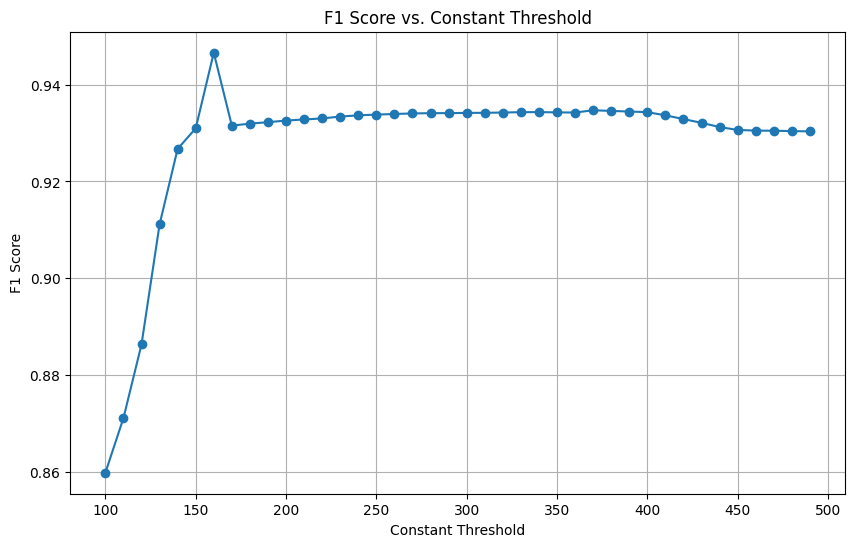

In [ ]:
# prompt: draw a diagram that changes values of constant threshold between 0 and 1000 and f1 score on y axis

import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# ... (your existing code to load and preprocess the data) ...

f1_scores = []
thresholds = []

for threshold in range(100, 500, 10):
    df['generated_threshold_value'] = threshold
    df['generated_label'] = np.where(df['score'] >= df['generated_threshold_value'], 1, 0)
    f1 = f1_score(df['label'], df['generated_label'], zero_division=1) #Handle cases where true positives and false positives are zero
    print(f"Threshold value : {threshold}")
    f1_scores.append(f1)
    thresholds.append(threshold)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-')
plt.xlabel("Constant Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. Constant Threshold")
plt.grid(True)
plt.show()


Threshold value : 100
Threshold value : 102
Threshold value : 104
Threshold value : 106
Threshold value : 108
Threshold value : 110
Threshold value : 112
Threshold value : 114
Threshold value : 116
Threshold value : 118
Threshold value : 120
Threshold value : 122
Threshold value : 124
Threshold value : 126
Threshold value : 128
Threshold value : 130
Threshold value : 132
Threshold value : 134
Threshold value : 136
Threshold value : 138
Threshold value : 140
Threshold value : 142
Threshold value : 144
Threshold value : 146
Threshold value : 148
Threshold value : 150
Threshold value : 152
Threshold value : 154
Threshold value : 156
Threshold value : 158
Threshold value : 160
Threshold value : 162
Threshold value : 164
Threshold value : 166
Threshold value : 168
Threshold value : 170
Threshold value : 172
Threshold value : 174
Threshold value : 176
Threshold value : 178
Threshold value : 180
Threshold value : 182
Threshold value : 184
Threshold value : 186
Threshold value : 188
Threshold 

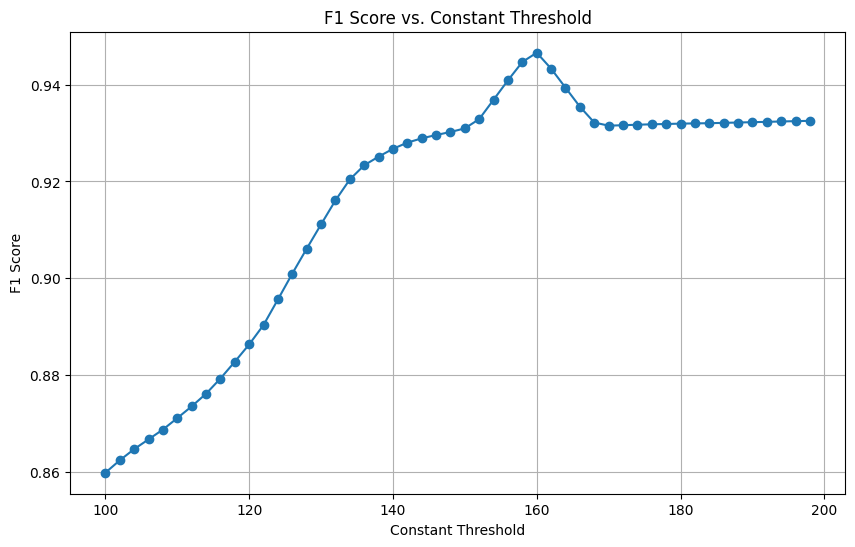

In [ ]:
# prompt: draw a diagram that changes values of constant threshold between 0 and 1000 and f1 score on y axis

import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# ... (your existing code to load and preprocess the data) ...

f1_scores = []
thresholds = []

for threshold in range(100, 200, 2):
    df['generated_threshold_value'] = threshold
    df['generated_label'] = np.where(df['score'] >= df['generated_threshold_value'], 1, 0)
    f1 = f1_score(df['label'], df['generated_label'], zero_division=1) #Handle cases where true positives and false positives are zero
    print(f"Threshold value : {threshold}")
    f1_scores.append(f1)
    thresholds.append(threshold)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-')
plt.xlabel("Constant Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. Constant Threshold")
plt.grid(True)
plt.show()


Threshold value : 140 , f1 : 0.9267273702830376
Threshold value : 141 , f1 : 0.9274225610139432
Threshold value : 142 , f1 : 0.9280110607410165
Threshold value : 143 , f1 : 0.9284721608715567
Threshold value : 144 , f1 : 0.9288927195889118
Threshold value : 145 , f1 : 0.9292515527586181
Threshold value : 146 , f1 : 0.9295807196977374
Threshold value : 147 , f1 : 0.9298984674595305
Threshold value : 148 , f1 : 0.9302094183803735
Threshold value : 149 , f1 : 0.930544490202019
Threshold value : 150 , f1 : 0.9309515678128335
Threshold value : 151 , f1 : 0.9316194969114545
Threshold value : 152 , f1 : 0.9328711038481177
Threshold value : 153 , f1 : 0.9348505759975693
Threshold value : 154 , f1 : 0.9368721218040149
Threshold value : 155 , f1 : 0.9388646461169416
Threshold value : 156 , f1 : 0.9408779527814857
Threshold value : 157 , f1 : 0.9428377111636165
Threshold value : 158 , f1 : 0.9446671687031064
Threshold value : 159 , f1 : 0.946104023966454
Threshold value : 160 , f1 : 0.94657041448

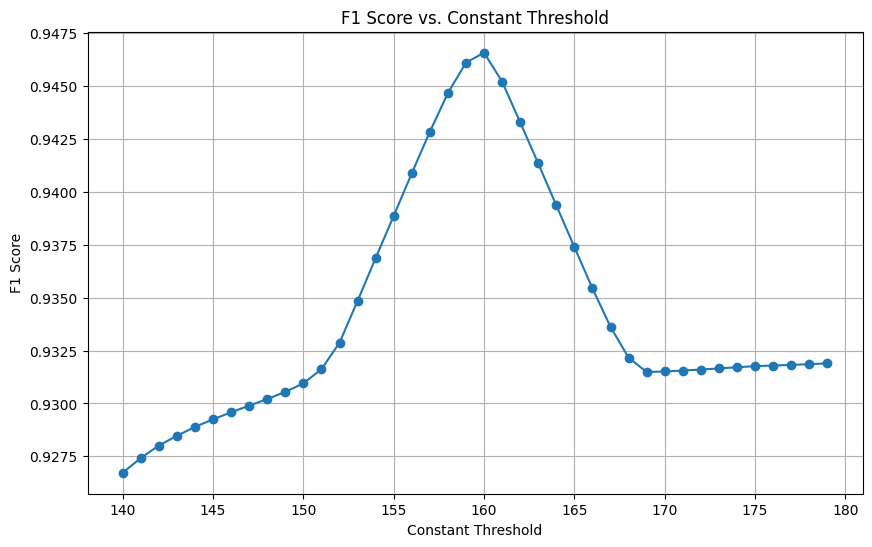

In [ ]:
# prompt: draw a diagram that changes values of constant threshold between 0 and 1000 and f1 score on y axis

import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# ... (your existing code to load and preprocess the data) ...

f1_scores = []
thresholds = []

for threshold in range(140, 180, 1):
    df['generated_threshold_value'] = threshold
    df['generated_label'] = np.where(df['score'] >= df['generated_threshold_value'], 1, 0)
    f1 = f1_score(df['label'], df['generated_label'], zero_division=1) #Handle cases where true positives and false positives are zero
    print(f"Threshold value : {threshold} , f1 : {f1}")
    f1_scores.append(f1)
    thresholds.append(threshold)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-')
plt.xlabel("Constant Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. Constant Threshold")
plt.grid(True)
plt.show()


## Dynamic threshold for DARPA

I think this equation is a good starting point for a hueristic function for the threshold

$a*sum^2+b*sum+c+\sqrt{sum}+d$

and in the following cells I will include numerical analysis for different values of a,b,c,d

a=0.0,b=0,c=0,d=0 F1 Score: 0.750789029442699
a=0.05,b=0,c=0,d=0 F1 Score: 0.0
a=0.1,b=0,c=0,d=0 F1 Score: 0.0
a=0.15000000000000002,b=0,c=0,d=0 F1 Score: 0.0
a=0.2,b=0,c=0,d=0 F1 Score: 0.0
a=0.25,b=0,c=0,d=0 F1 Score: 0.0
a=0.30000000000000004,b=0,c=0,d=0 F1 Score: 0.0
a=0.35000000000000003,b=0,c=0,d=0 F1 Score: 0.0
a=0.4,b=0,c=0,d=0 F1 Score: 0.0
a=0.45,b=0,c=0,d=0 F1 Score: 0.0
a=0.5,b=0,c=0,d=0 F1 Score: 0.0
a=0.55,b=0,c=0,d=0 F1 Score: 0.0
a=0.6000000000000001,b=0,c=0,d=0 F1 Score: 0.0
a=0.65,b=0,c=0,d=0 F1 Score: 0.0
a=0.7000000000000001,b=0,c=0,d=0 F1 Score: 0.0
a=0.75,b=0,c=0,d=0 F1 Score: 0.0
a=0.8,b=0,c=0,d=0 F1 Score: 0.0
a=0.8500000000000001,b=0,c=0,d=0 F1 Score: 0.0
a=0.9,b=0,c=0,d=0 F1 Score: 0.0
a=0.9500000000000001,b=0,c=0,d=0 F1 Score: 0.0
a=1.0,b=0,c=0,d=0 F1 Score: 0.0
a=1.05,b=0,c=0,d=0 F1 Score: 0.0
a=1.1,b=0,c=0,d=0 F1 Score: 0.0
a=1.1500000000000001,b=0,c=0,d=0 F1 Score: 0.0
a=1.2000000000000002,b=0,c=0,d=0 F1 Score: 0.0
a=1.25,b=0,c=0,d=0 F1 Score: 0.0
a=1.3,b=

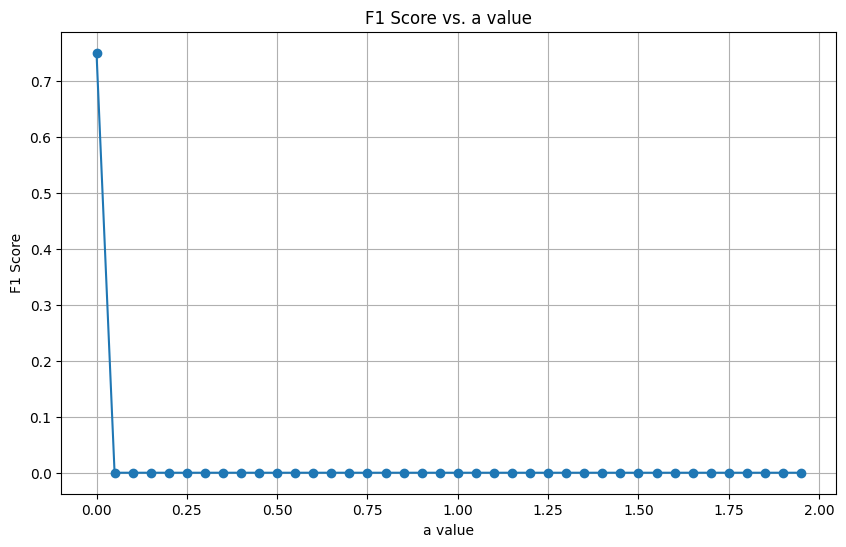

In [ ]:
# prompt: I want to calculate generated_threshold_value by a*sum^2+b*sum+c*sqrt(sum)+d after that I want to to generate generated_label if the score is generated_threshold_value greater thatn


import matplotlib.pyplot as plt


thresholds = []
f1_scores = []

for i in np.arange(0, 2, 0.05):
  # Define coefficients for the threshold calculation
  a = i    # Example value, adjust as needed
  b = 0    # Example value, adjust as needed
  c = 0    # Example value, adjust as needed
  d = 0   # Example value, adjust as needed
  print(f"a={a},b={b},c={c},d={d}",end=' ')

  # Calculate generated_threshold_value
  df['generated_threshold_value'] = (a * (df['sum']**2)) + (b * df['sum']) + (c * np.sqrt(df['sum'])) + d


  # Generate labels based on the calculated threshold
  df['generated_label'] = np.where(df['score'] >= df['generated_threshold_value'], 1, 0)

  # Calculate the F1-score
  f1 = f1_score(df['label'], df['generated_label'], zero_division=1)

  thresholds.append(a)
  f1_scores.append(f1)

  print(f"F1 Score: {f1}")


plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-')
plt.xlabel("a value")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. a value")
plt.grid(True)
plt.show()

a=0,b=0.2,c=0,d=0 F1 Score: 0.8652709334865868
a=0,b=0.21000000000000002,c=0,d=0 F1 Score: 0.8666745571062663
a=0,b=0.22000000000000003,c=0,d=0 F1 Score: 0.8682295723352262
a=0,b=0.23000000000000004,c=0,d=0 F1 Score: 0.8714608797356963
a=0,b=0.24000000000000005,c=0,d=0 F1 Score: 0.8764288320104048
a=0,b=0.25000000000000006,c=0,d=0 F1 Score: 0.88014723779157
a=0,b=0.26000000000000006,c=0,d=0 F1 Score: 0.8812295695611065
a=0,b=0.2700000000000001,c=0,d=0 F1 Score: 0.8812531999710199
a=0,b=0.2800000000000001,c=0,d=0 F1 Score: 0.881244080399534
a=0,b=0.2900000000000001,c=0,d=0 F1 Score: 0.881169204083307
a=0,b=0.3000000000000001,c=0,d=0 F1 Score: 0.8810311623322465
a=0,b=0.3100000000000001,c=0,d=0 F1 Score: 0.8808051264454142
a=0,b=0.3200000000000001,c=0,d=0 F1 Score: 0.8804883752714462
a=0,b=0.3300000000000001,c=0,d=0 F1 Score: 0.8801555603462948
a=0,b=0.34000000000000014,c=0,d=0 F1 Score: 0.8798159558835904
a=0,b=0.35000000000000014,c=0,d=0 F1 Score: 0.8793886418748901
a=0,b=0.36000000000

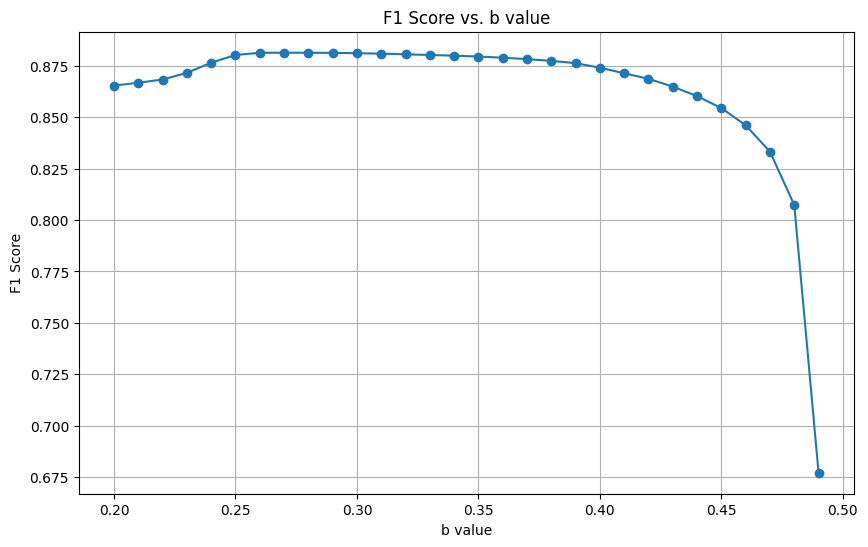

In [ ]:
# prompt: I want to calculate generated_threshold_value by a*sum^2+b*sum+c*sqrt(sum)+d after that I want to to generate generated_label if the score is generated_threshold_value greater thatn


import matplotlib.pyplot as plt


thresholds = []
f1_scores = []

for i in np.arange(0.2, 0.5, 0.01):
  # Define coefficients for the threshold calculation
  a = 0    # Example value, adjust as needed
  b = i    # Example value, adjust as needed
  c = 0    # Example value, adjust as needed
  d = 0   # Example value, adjust as needed
  print(f"a={a},b={b},c={c},d={d}",end=' ')

  # Calculate generated_threshold_value
  df['generated_threshold_value'] = (a * (df['sum']**2)) + (b * df['sum']) + (c * np.sqrt(df['sum'])) + d


  # Generate labels based on the calculated threshold
  df['generated_label'] = np.where(df['score'] >= df['generated_threshold_value'], 1, 0)

  # Calculate the F1-score
  f1 = f1_score(df['label'], df['generated_label'], zero_division=1)

  thresholds.append(b)
  f1_scores.append(f1)

  print(f"F1 Score: {f1}")


plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-')
plt.xlabel("b value")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. b value")
plt.grid(True)
plt.show()

a=0,b=0,c=0.0,d=0 F1 Score: 0.750789029442699
a=0,b=0,c=0.5,d=0 F1 Score: 0.7520492631006241
a=0,b=0,c=1.0,d=0 F1 Score: 0.7602206675309608
a=0,b=0,c=1.5,d=0 F1 Score: 0.7788892041217186
a=0,b=0,c=2.0,d=0 F1 Score: 0.8268138220641834
a=0,b=0,c=2.5,d=0 F1 Score: 0.8651375418565059
a=0,b=0,c=3.0,d=0 F1 Score: 0.8836645625145106
a=0,b=0,c=3.5,d=0 F1 Score: 0.8921967793160336
a=0,b=0,c=4.0,d=0 F1 Score: 0.8977449193521058
a=0,b=0,c=4.5,d=0 F1 Score: 0.9097097496578975
a=0,b=0,c=5.0,d=0 F1 Score: 0.9175380307680665
a=0,b=0,c=5.5,d=0 F1 Score: 0.9243830269347554
a=0,b=0,c=6.0,d=0 F1 Score: 0.9307309058483864
a=0,b=0,c=6.5,d=0 F1 Score: 0.931092020595063
a=0,b=0,c=7.0,d=0 F1 Score: 0.9312398697489735
a=0,b=0,c=7.5,d=0 F1 Score: 0.9313380810721476
a=0,b=0,c=8.0,d=0 F1 Score: 0.9306230057288585
a=0,b=0,c=8.5,d=0 F1 Score: 0.92968136309344
a=0,b=0,c=9.0,d=0 F1 Score: 0.9285989734697496
a=0,b=0,c=9.5,d=0 F1 Score: 0.9274370725191718
a=0,b=0,c=10.0,d=0 F1 Score: 0.9259122641638319
a=0,b=0,c=10.5,d

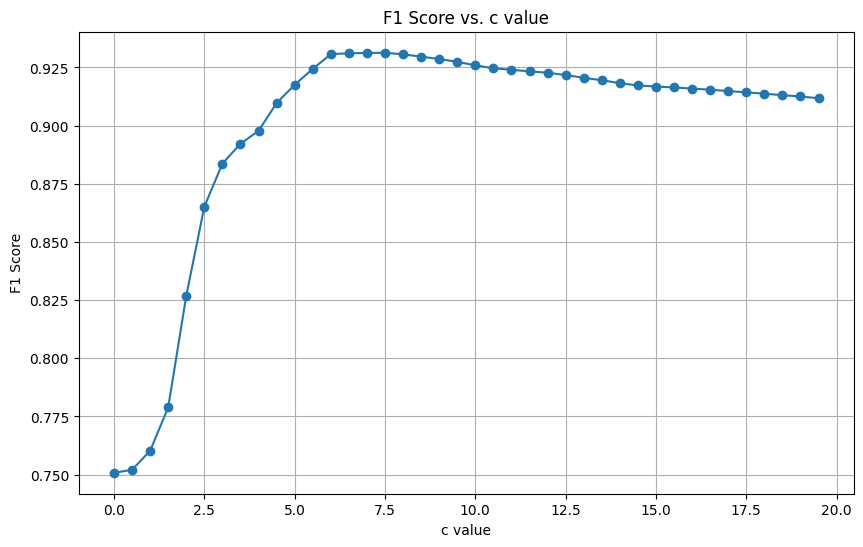

In [ ]:
# prompt: I want to calculate generated_threshold_value by a*sum^2+b*sum+c*sqrt(sum)+d after that I want to to generate generated_label if the score is generated_threshold_value greater thatn


import matplotlib.pyplot as plt


thresholds = []
f1_scores = []

for i in np.arange(0, 20, 0.5):
  # Define coefficients for the threshold calculation
  a = 0    # Example value, adjust as needed
  b = 0    # Example value, adjust as needed
  c = i    # Example value, adjust as needed
  d = 0   # Example value, adjust as needed
  print(f"a={a},b={b},c={c},d={d}",end=' ')

  # Calculate generated_threshold_value
  df['generated_threshold_value'] = (a * (df['sum']**2)) + (b * df['sum']) + (c * np.sqrt(df['sum'])) + d


  # Generate labels based on the calculated threshold
  df['generated_label'] = np.where(df['score'] >= df['generated_threshold_value'], 1, 0)

  # Calculate the F1-score
  f1 = f1_score(df['label'], df['generated_label'], zero_division=1)

  thresholds.append(c)
  f1_scores.append(f1)

  print(f"F1 Score: {f1}")


plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-')
plt.xlabel("c value")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. c value")
plt.grid(True)
plt.show()

a=0,b=0,c=0,d=0 F1 Score: 0.750789029442699
a=0,b=0,c=0,d=5 F1 Score: 0.7514127318563277
a=0,b=0,c=0,d=10 F1 Score: 0.7535952072349775
a=0,b=0,c=0,d=15 F1 Score: 0.7569476803606875
a=0,b=0,c=0,d=20 F1 Score: 0.7592244352397925
a=0,b=0,c=0,d=25 F1 Score: 0.7613854860084364
a=0,b=0,c=0,d=30 F1 Score: 0.7635167068816777
a=0,b=0,c=0,d=35 F1 Score: 0.7664641098240327
a=0,b=0,c=0,d=40 F1 Score: 0.7702688449493486
a=0,b=0,c=0,d=45 F1 Score: 0.7750038161590985
a=0,b=0,c=0,d=50 F1 Score: 0.7808369194655924
a=0,b=0,c=0,d=55 F1 Score: 0.7877294049418798
a=0,b=0,c=0,d=60 F1 Score: 0.7953378821201647
a=0,b=0,c=0,d=65 F1 Score: 0.8033431251720498
a=0,b=0,c=0,d=70 F1 Score: 0.8115416585182388
a=0,b=0,c=0,d=75 F1 Score: 0.8199799402341177
a=0,b=0,c=0,d=80 F1 Score: 0.8286253315709025
a=0,b=0,c=0,d=85 F1 Score: 0.837139164287439
a=0,b=0,c=0,d=90 F1 Score: 0.8456850338397869
a=0,b=0,c=0,d=95 F1 Score: 0.8530888656943276
a=0,b=0,c=0,d=100 F1 Score: 0.8598644375138558
a=0,b=0,c=0,d=105 F1 Score: 0.8657629

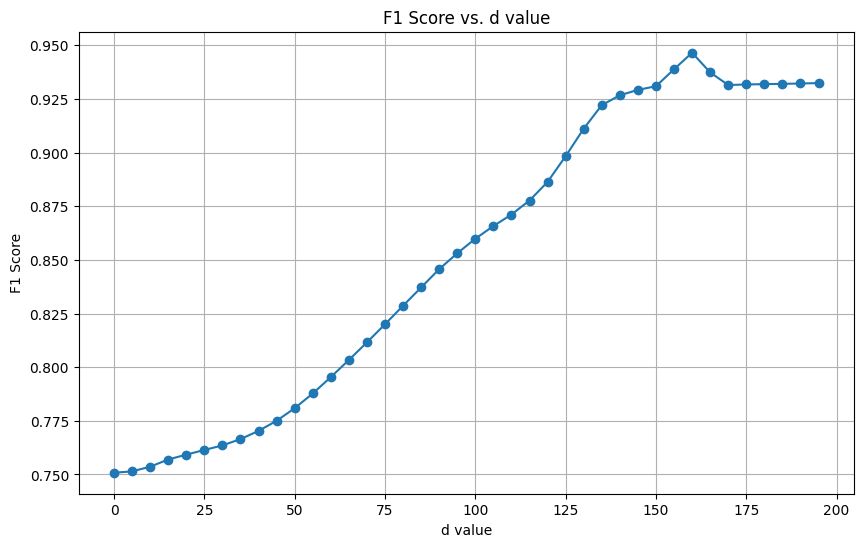

In [ ]:
# prompt: I want to calculate generated_threshold_value by a*sum^2+b*sum+c*sqrt(sum)+d after that I want to to generate generated_label if the score is generated_threshold_value greater thatn


import matplotlib.pyplot as plt


thresholds = []
f1_scores = []

for i in np.arange(0, 200, 5):
  # Define coefficients for the threshold calculation
  a = 0    # Example value, adjust as needed
  b = 0    # Example value, adjust as needed
  c = 0    # Example value, adjust as needed
  d = i   # Example value, adjust as needed
  print(f"a={a},b={b},c={c},d={d}",end=' ')

  # Calculate generated_threshold_value
  df['generated_threshold_value'] = (a * (df['sum']**2)) + (b * df['sum']) + (c * np.sqrt(df['sum'])) + d


  # Generate labels based on the calculated threshold
  df['generated_label'] = np.where(df['score'] >= df['generated_threshold_value'], 1, 0)

  # Calculate the F1-score
  f1 = f1_score(df['label'], df['generated_label'], zero_division=1)

  thresholds.append(d)
  f1_scores.append(f1)

  print(f"F1 Score: {f1}")


plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-')
plt.xlabel("d value")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. d value")
plt.grid(True)
plt.show()

So try sum of all values divide by 3 to generate an item with combination of values.


Lets try some values in the following cells

In [ ]:
a = 0
b = 0.3
c = 0
d = 0

print(f"a={a},b={b},c={c},d={d}",end=' ')
df['generated_threshold_value'] = (a * (df['sum']**2)) + (b * df['sum']) + (c * np.sqrt(df['sum'])) + d
df['generated_label'] = np.where(df['score'] >= df['generated_threshold_value'], 1, 0)
f1 = f1_score(df['label'], df['generated_label'], zero_division=1)
print(f"F1 Score: {f1}")

a=0,b=0.3,c=0,d=0 F1 Score: 0.8810292990745852


In [ ]:
a = 0
b = 0
c = 6
d = 0

print(f"a={a},b={b},c={c},d={d}",end=' ')
df['generated_threshold_value'] = (a * (df['sum']**2)) + (b * df['sum']) + (c * np.sqrt(df['sum'])) + d
df['generated_label'] = np.where(df['score'] >= df['generated_threshold_value'], 1, 0)
f1 = f1_score(df['label'], df['generated_label'], zero_division=1)
print(f"F1 Score: {f1}")

a=0,b=0,c=6,d=0 F1 Score: 0.9307309058483864


## How to optimize for best params for just DARPA

In other words we have on objective function to minimize

$Objective(a,b,c) = ax^2 + bx + c$ where $x = \sqrt{sum}$

I have to minimize this function and find a,b,c for every dataset that works pretty good.




In [55]:
a = 0
b = 0.3
c = 6
d = 160

print(f"a={a},b={b},c={c},d={d}",end=' ')
df['generated_threshold_value'] = ((a * (df['sum']**2)) + (b * df['sum']) + (c * np.sqrt(df['sum'])) + d)
df['generated_label'] = np.where(df['score'] >= df['generated_threshold_value'], 1, 0)
f1 = f1_score(df['label'], df['generated_label'], zero_division=1)
print(f"F1 Score: {f1}")

a=0,b=0.3,c=6,d=160 F1 Score: 0.8775101162847646


In [58]:
a = 0
b = 0
c = 6
d = 0

print(f"a={a},b={b},c={c},d={d}",end=' ')
df['generated_threshold_value'] = ((a * (df['sum']**2)) + (b * df['sum']) + (c * np.sqrt(df['sum'])) + d)
df['generated_label'] = np.where(df['score'] >= df['generated_threshold_value'], 1, 0)
f1 = f1_score(df['label'], df['generated_label'], zero_division=1)
print(f"F1 Score: {f1:0.4f}")

a=0,b=0,c=6,d=0 F1 Score: 0.9307


In [59]:
!pip install scikit-optimize

In [60]:
def expensive_function(a,b,c):
  print(f"a={a:0.2f},b={b:0.2f},c={c:0.2f}",end=' ')
  df['generated_threshold_value'] = (a * df['sum']) + (b * np.sqrt(df['sum'])) + c
  df['generated_label'] = np.where(df['score'] >= df['generated_threshold_value'], 1, 0)
  f1 = f1_score(df['label'], df['generated_label'], zero_division=1)
  print(f"F1 Score: {f1}")
  return -100*f1

In [61]:
from skopt import gp_minimize
from skopt.space import Real

# Define the search space for a, b, c
space = [
    Real(-10.0, 10.0, name='a'),
    Real(-10.0, 10.0, name='b'),
    Real(-10.0, 10.0, name='c'),
]

known_good_params = [[0, 6, 0]]

# Define your expensive cost function here
def cost_fn(params):
    a, b, c = params
    return expensive_function(a, b, c)

# Run Bayesian Optimization
result = gp_minimize(
    func=cost_fn,
    dimensions=space,
    n_calls=120,            # Total evaluations (can tweak)
    n_initial_points=10,   # Initial random evaluations
    acq_func="EI",         # Expected Improvement (other options: "PI", "LCB")
    random_state=1,
    x0 = known_good_params,
    y0 = [cost_fn((item[0],item[1],item[2])) for item in known_good_params]
)

# Best found values
print("Best parameters (a, b, c):", result.x)
print("Minimum cost:", -1*result.fun)


a=0.00,b=6.00,c=0.00 F1 Score: 0.9307309058483864
a=9.94,b=8.65,c=-7.44 F1 Score: 0.0
a=9.98,b=-5.28,c=-2.07 F1 Score: 0.0
a=-2.24,b=3.39,c=8.71 F1 Score: 0.7507894413107558
a=6.93,b=-3.73,c=0.49 F1 Score: 0.0
a=-1.13,b=-5.41,c=0.69 F1 Score: 0.750789029442699
a=8.28,b=-0.86,c=-1.39 F1 Score: 0.0
a=8.78,b=5.57,c=4.32 F1 Score: 0.0
a=6.06,b=-8.14,c=0.36 F1 Score: 0.0
a=7.30,b=6.58,c=6.59 F1 Score: 0.0
a=-4.54,b=-8.82,c=3.41 F1 Score: 0.750789029442699
a=0.90,b=10.00,c=10.00 F1 Score: 0.0
a=-1.72,b=10.00,c=-1.32 F1 Score: 0.7508834283342553
a=0.51,b=10.00,c=-3.74 F1 Score: 0.0
a=-7.40,b=7.14,c=-6.17 F1 Score: 0.750789029442699
a=-0.30,b=2.42,c=7.26 F1 Score: 0.7515023518983743
a=-10.00,b=-10.00,c=10.00 F1 Score: 0.750789029442699
a=-5.73,b=-10.00,c=10.00 F1 Score: 0.750789029442699
a=-10.00,b=10.00,c=-10.00 F1 Score: 0.750789029442699
a=-5.58,b=10.00,c=-10.00 F1 Score: 0.750789029442699
a=0.66,b=5.92,c=-0.29 F1 Score: 0.0
a=-0.32,b=6.03,c=0.10 F1 Score: 0.7534065052399243
a=1.33,b=5.89,c

Reduce noise without multiplication 100

In [62]:
def expensive_function(a,b,c):
  print(f"a={a:0.2f},b={b:0.2f},c={c:0.2f}",end=' ')
  df['generated_threshold_value'] = (a * df['sum']) + (b * np.sqrt(df['sum'])) + c
  df['generated_label'] = np.where(df['score'] >= df['generated_threshold_value'], 1, 0)
  f1 = f1_score(df['label'], df['generated_label'], zero_division=1)
  print(f"F1 Score: {f1:0.4f}")
  return -f1

In [ ]:
from skopt import gp_minimize
from skopt.space import Real

# Define the search space for a, b, c
space = [
    Real(-2.0, 2.0, name='a'),
    Real(-100.0, 100.0, name='b'),
    Real(-100.0, 100.0, name='c'),
]

known_good_params = [[0, 6, 0]]

# Define your expensive cost function here
def cost_fn(params):
    a, b, c = params
    return expensive_function(a, b, c)

# Run Bayesian Optimization
result = gp_minimize(
    func=cost_fn,
    dimensions=space,
    n_calls=120,            # Total evaluations (can tweak)
    n_initial_points=10,   # Initial random evaluations
    acq_func="EI",         # Expected Improvement (other options: "PI", "LCB")
    random_state=1,
    x0 = known_good_params,
    y0 = [cost_fn((item[0],item[1],item[2])) for item in known_good_params]
)

# Best found values
print("Best parameters (a, b, c):", result.x)
print("Minimum cost:", -1*result.fun)


a=0.00,b=6.00,c=0.00 F1 Score: 0.9307309058483864
a=1.99,b=86.51,c=-74.38 F1 Score: 0.0
a=2.00,b=-52.78,c=-20.68 F1 Score: 0.029243550989373736
a=-0.45,b=33.95,c=87.11 F1 Score: 0.9307243907893923
a=1.39,b=-37.35,c=4.91 F1 Score: 0.04185789870099587
a=-0.23,b=-54.08,c=6.88 F1 Score: 0.750789029442699
a=1.66,b=-8.56,c=-13.86 F1 Score: 0.0011058600376298584
a=1.76,b=55.68,c=43.19 F1 Score: 0.0
a=1.21,b=-81.44,c=3.63 F1 Score: 0.15292634923182497
a=1.46,b=65.83,c=65.92 F1 Score: 0.0
a=-0.91,b=-88.15,c=34.11 F1 Score: 0.750789029442699
a=0.24,b=100.00,c=91.92 F1 Score: 0.0
a=-0.74,b=-0.69,c=-50.49 F1 Score: 0.750789029442699
a=-0.25,b=11.44,c=100.00 F1 Score: 0.8988934456807444
a=-1.51,b=67.31,c=100.00 F1 Score: 0.8890119058912982
a=-0.98,b=52.66,c=-100.00 F1 Score: 0.9130077644547272
a=-2.00,b=32.22,c=-100.00 F1 Score: 0.7516647435005874
a=-2.00,b=100.00,c=-100.00 F1 Score: 0.9060720382215156
a=-2.00,b=-100.00,c=-100.00 F1 Score: 0.750789029442699
a=-1.48,b=100.00,c=-100.00 F1 Score: 0.93

More broad range for values in the process for c value, because it stick limit



In [63]:
from skopt import gp_minimize
from skopt.space import Real

# Define the search space for a, b, c
space = [
    Real(-2.0, 2.0, name='a'),
    Real(-100.0, 100.0, name='b'),
    Real(-1000.0, 1000.0, name='c'),
]

known_good_params = [[0, 6, 0]]

# Define your expensive cost function here
def cost_fn(params):
    a, b, c = params
    return expensive_function(a, b, c)

# Run Bayesian Optimization
result = gp_minimize(
    func=cost_fn,
    dimensions=space,
    n_calls=120,            # Total evaluations (can tweak)
    n_initial_points=10,   # Initial random evaluations
    acq_func="EI",         # Expected Improvement (other options: "PI", "LCB")
    random_state=1,
    x0 = known_good_params,
    y0 = [cost_fn((item[0],item[1],item[2])) for item in known_good_params]
)

# Best found values
print("Best parameters (a, b, c):", result.x)
print("Minimum cost:", -1*result.fun)


a=0.00,b=6.00,c=0.00 F1 Score: 0.9307
a=1.99,b=86.51,c=-743.75 F1 Score: 0.0009
a=2.00,b=-52.78,c=-206.84 F1 Score: 0.0581
a=-0.45,b=33.95,c=871.08 F1 Score: 0.9272
a=1.39,b=-37.35,c=49.10 F1 Score: 0.0289
a=-0.23,b=-54.08,c=68.83 F1 Score: 0.7508
a=1.66,b=-8.56,c=-138.60 F1 Score: 0.0023
a=1.76,b=55.68,c=431.94 F1 Score: 0.0000
a=1.21,b=-81.44,c=36.31 F1 Score: 0.1525
a=1.46,b=65.83,c=659.21 F1 Score: 0.0000
a=-0.91,b=-88.15,c=341.06 F1 Score: 0.7508
a=-0.07,b=100.00,c=904.29 F1 Score: 0.8230
a=-2.00,b=34.60,c=768.90 F1 Score: 0.7975
a=-1.52,b=96.70,c=-792.73 F1 Score: 0.9209
a=-0.83,b=100.00,c=-1000.00 F1 Score: 0.9217
a=-0.63,b=100.00,c=-296.11 F1 Score: 0.9121
a=-1.26,b=37.53,c=-764.75 F1 Score: 0.7508
a=-0.47,b=100.00,c=-1000.00 F1 Score: 0.9029
a=-0.16,b=30.85,c=-1000.00 F1 Score: 0.7640
a=-0.63,b=100.00,c=1000.00 F1 Score: 0.9061
a=0.22,b=-83.57,c=-1000.00 F1 Score: 0.7508
a=-1.69,b=-100.00,c=-527.51 F1 Score: 0.7508
a=-0.66,b=100.00,c=1000.00 F1 Score: 0.9078
a=-2.00,b=100.00,c

/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [-2.0, 100.0, 1000.0] before, using random point [1.3528557807496862, 79.64499171945411, 629.485728811853]
  warnings.warn(


a=1.35,b=79.64,c=629.49 F1 Score: 0.0000
a=-1.44,b=100.00,c=231.95 F1 Score: 0.9291


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [-2.0, 100.0, 1000.0] before, using random point [1.5114664700509408, 19.890143053601975, -196.7816467971386]
  warnings.warn(


a=1.51,b=19.89,c=-196.78 F1 Score: 0.0007
a=-0.43,b=49.99,c=1000.00 F1 Score: 0.9201
a=-1.12,b=100.00,c=-1000.00 F1 Score: 0.9272


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [-2.0, 100.0, 1000.0] before, using random point [0.7855042222253359, -51.18598387584202, -269.8291316538715]
  warnings.warn(


a=0.79,b=-51.19,c=-269.83 F1 Score: 0.2077
a=-1.22,b=100.00,c=1000.00 F1 Score: 0.9250
a=-1.82,b=100.00,c=1000.00 F1 Score: 0.9303
a=0.05,b=-100.00,c=1000.00 F1 Score: 0.7515


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [-2.0, 100.0, 1000.0] before, using random point [1.208511593169685, 46.125987135761676, 577.8216807227736]
  warnings.warn(


a=1.21,b=46.13,c=577.82 F1 Score: 0.0000
a=-0.03,b=100.00,c=33.62 F1 Score: 0.8204
a=0.14,b=6.34,c=46.04 F1 Score: 0.8821
a=-0.48,b=29.42,c=45.72 F1 Score: 0.9325
a=-0.57,b=24.65,c=1000.00 F1 Score: 0.9310
a=-0.56,b=30.23,c=1000.00 F1 Score: 0.9296
a=-0.56,b=33.15,c=1000.00 F1 Score: 0.9290
a=-0.66,b=54.51,c=389.12 F1 Score: 0.9276
a=-2.00,b=100.00,c=-642.49 F1 Score: 0.8670
a=-0.81,b=100.00,c=-144.77 F1 Score: 0.9193
a=-1.69,b=100.00,c=414.21 F1 Score: 0.9307
a=-1.22,b=100.00,c=138.36 F1 Score: 0.9271
a=-0.05,b=2.85,c=-1000.00 F1 Score: 0.7508
a=0.03,b=0.78,c=1000.00 F1 Score: 0.9211


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [-2.0, 100.0, 1000.0] before, using random point [-1.8319044614610052, 8.394922650060721, 107.76151816866309]
  warnings.warn(


a=-1.83,b=8.39,c=107.76 F1 Score: 0.7515
a=-0.53,b=10.36,c=1000.00 F1 Score: 0.9202
a=-1.13,b=100.00,c=-437.25 F1 Score: 0.9275
a=-1.35,b=100.00,c=-1000.00 F1 Score: 0.9296
a=-1.47,b=-100.00,c=1000.00 F1 Score: 0.7514
a=-1.41,b=100.00,c=-216.20 F1 Score: 0.9299


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [-2.0, 100.0, 1000.0] before, using random point [-0.7184845648984293, -38.58519808415449, 44.12559852960658]
  warnings.warn(


a=-0.72,b=-38.59,c=44.13 F1 Score: 0.7508
a=-0.59,b=46.67,c=1000.00 F1 Score: 0.9261
a=-1.10,b=-24.45,c=577.62 F1 Score: 0.7526
a=-1.09,b=73.66,c=1000.00 F1 Score: 0.9280
a=-1.34,b=73.80,c=1000.00 F1 Score: 0.9301
a=-0.51,b=47.97,c=572.48 F1 Score: 0.9256


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [-2.0, 100.0, 1000.0] before, using random point [-1.5905816029990372, 90.60852217838138, -467.3029167006856]
  warnings.warn(


a=-1.59,b=90.61,c=-467.30 F1 Score: 0.9137


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [-2.0, 100.0, 1000.0] before, using random point [-1.1422625201333594, -48.37106181328726, 802.4966723342714]
  warnings.warn(


a=-1.14,b=-48.37,c=802.50 F1 Score: 0.7520
a=-0.29,b=19.86,c=551.64 F1 Score: 0.9295
a=-0.45,b=41.79,c=222.72 F1 Score: 0.9277


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [-2.0, 100.0, 1000.0] before, using random point [1.8722137152986504, 87.37194907077807, -593.6451241751984]
  warnings.warn(


a=1.87,b=87.37,c=-593.65 F1 Score: 0.0004


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [-2.0, 100.0, 1000.0] before, using random point [1.2229282081666164, -66.46614145974954, -933.0265069958041]
  warnings.warn(


a=1.22,b=-66.47,c=-933.03 F1 Score: 0.1457


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [-2.0, 100.0, 1000.0] before, using random point [-1.6321174233841127, 90.57474068486235, 284.45993710268385]
  warnings.warn(


a=-1.63,b=90.57,c=284.46 F1 Score: 0.9303


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [-2.0, 100.0, 1000.0] before, using random point [-0.7429451730444512, 52.94862979183256, -357.970445301146]
  warnings.warn(


a=-0.74,b=52.95,c=-357.97 F1 Score: 0.9324
a=-0.70,b=63.82,c=50.19 F1 Score: 0.9271
a=-0.61,b=43.03,c=392.73 F1 Score: 0.9298


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [-2.0, 100.0, 1000.0] before, using random point [-1.26109756830764, -57.74385098166924, 610.2607814790902]
  warnings.warn(


a=-1.26,b=-57.74,c=610.26 F1 Score: 0.7513
a=-0.86,b=70.03,c=409.85 F1 Score: 0.9272
a=-0.68,b=72.67,c=-405.11 F1 Score: 0.9257


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [-2.0, 100.0, 1000.0] before, using random point [-0.7371752214549094, 10.238753041655741, 917.0255693497779]
  warnings.warn(


a=-0.74,b=10.24,c=917.03 F1 Score: 0.8682
a=-0.97,b=100.00,c=-1000.00 F1 Score: 0.9247


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [-2.0, 100.0, 1000.0] before, using random point [0.08964092532043111, 59.16301987904612, 381.3066649906341]
  warnings.warn(


a=0.09,b=59.16,c=381.31 F1 Score: 0.8406


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [-2.0, 100.0, 1000.0] before, using random point [1.8000987390994307, -61.87847984982441, 45.481966256630585]
  warnings.warn(


a=1.80,b=-61.88,c=45.48 F1 Score: 0.0745


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [-2.0, 100.0, 1000.0] before, using random point [0.09185887794099257, 98.61800213978046, -266.379843989842]
  warnings.warn(


a=0.09,b=98.62,c=-266.38 F1 Score: 0.7321


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [-2.0, 100.0, 1000.0] before, using random point [-1.2839631912473335, 40.8265599685046, -669.7919493548847]
  warnings.warn(


a=-1.28,b=40.83,c=-669.79 F1 Score: 0.7508
Best parameters (a, b, c): [-0.48113792768088004, 29.422960025790445, 45.71654636148105]
Minimum cost: 0.9324732891071265


Not better result

to avoid sticking to value that is constant to this dataset, I will limit this value in the following tests

### What if we remove the constant value

In [66]:
def expensive_function(a,b,c):
  print(f"a={a:0.2f},b={b:0.2f},c={c:0.2f}",end=' ')
  df['generated_threshold_value'] = (a * df['sum']) + (b * np.sqrt(df['sum'])) + c
  df['generated_label'] = np.where(df['score'] >= df['generated_threshold_value'], 1, 0)
  f1 = f1_score(df['label'], df['generated_label'], zero_division=1)
  print(f"F1 Score: {f1:0.4f}")
  return -f1

In [69]:
from skopt import gp_minimize
from skopt.space import Real

# Define the search space for a, b, c
space = [
    Real(-2.0, 2.0, name='a'),
    Real(-100.0, 100.0, name='b'),
]

known_good_params = [[0, 6]]

# Define your expensive cost function here
def cost_fn(params):
    a, b = params
    return expensive_function(a, b, 0)

# Run Bayesian Optimization
result = gp_minimize(
    func=cost_fn,
    dimensions=space,
    n_calls=120,            # Total evaluations (can tweak)
    n_initial_points=10,   # Initial random evaluations
    acq_func="EI",         # Expected Improvement (other options: "PI", "LCB")
    random_state=1,
    x0 = known_good_params,
    y0 = [cost_fn((item[0],item[1])) for item in known_good_params]
)

# Best found values
print("Best parameters (a, b, c):", result.x)
print("Minimum cost:", -1*result.fun)


a=0.00,b=6.00,c=0.00 F1 Score: 0.9307
a=1.99,b=86.51,c=0.00 F1 Score: 0.0000
a=-1.49,b=99.81,c=0.00 F1 Score: 0.9300
a=-1.06,b=-20.68,c=0.00 F1 Score: 0.7508
a=-0.45,b=33.95,c=0.00 F1 Score: 0.9314
a=1.74,b=69.26,c=0.00 F1 Score: 0.0000
a=-0.75,b=4.91,c=0.00 F1 Score: 0.7510
a=-0.23,b=-54.08,c=0.00 F1 Score: 0.7508
a=0.14,b=82.79,c=0.00 F1 Score: 0.7609
a=-0.17,b=-13.86,c=0.00 F1 Score: 0.7508
a=1.76,b=55.68,c=0.00 F1 Score: 0.0000
a=-2.00,b=100.00,c=0.00 F1 Score: 0.9110
a=-0.68,b=100.00,c=0.00 F1 Score: 0.9131
a=-2.00,b=-100.00,c=0.00 F1 Score: 0.7508
a=0.73,b=-59.63,c=0.00 

/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [-2.0, 100.0] before, using random point [0.7258324210280169, -59.632602308902825]
  warnings.warn(


F1 Score: 0.3696
a=1.59,b=28.44,c=0.00 

/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [-2.0, 100.0] before, using random point [1.5860343947583244, 28.43911406464713]
  warnings.warn(


F1 Score: 0.0000
a=-0.42,b=100.00,c=0.00 F1 Score: 0.8970
a=1.12,b=78.58,c=0.00 

/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [-2.0, 100.0] before, using random point [1.1190302322155934, 78.57854218499381]
  warnings.warn(


F1 Score: 0.0000
a=-1.69,b=100.00,c=0.00 F1 Score: 0.9309
a=-1.68,b=-71.61,c=0.00 

/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [-2.0, 100.0] before, using random point [-1.6831725989273294, -71.61084063061682]
  warnings.warn(


F1 Score: 0.7508
a=0.31,b=64.03,c=0.00 

/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [-2.0, 100.0] before, using random point [0.31464876999949576, 64.02775374801206]
  warnings.warn(


F1 Score: 0.0000
a=-0.57,b=100.00,c=0.00 F1 Score: 0.9063
a=-1.29,b=100.00,c=0.00 F1 Score: 0.9284
a=-1.85,b=100.00,c=0.00 F1 Score: 0.9232
a=0.02,b=100.00,c=0.00 F1 Score: 0.7973
a=0.04,b=-100.00,c=0.00 F1 Score: 0.7508


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [-2.0, 100.0] before, using random point [-1.9579932251586194, -99.57116673271426]
  warnings.warn(


a=-1.96,b=-99.57,c=0.00 F1 Score: 0.7508
a=-1.34,b=-74.19,c=0.00 F1 Score: 0.7508
a=-0.99,b=100.00,c=0.00 F1 Score: 0.9237
a=-1.14,b=100.00,c=0.00 F1 Score: 0.9263
a=-0.48,b=-100.00,c=0.00 F1 Score: 0.7508
a=-0.84,b=100.00,c=0.00 F1 Score: 0.9198
a=0.05,b=12.95,c=0.00 F1 Score: 0.8990
a=-1.59,b=100.00,c=0.00 F1 Score: 0.9310
a=-1.42,b=32.43,c=0.00 F1 Score: 0.7645
a=-1.22,b=100.00,c=0.00 F1 Score: 0.9274
a=-0.66,b=87.52,c=0.00 F1 Score: 0.9179
a=-1.94,b=34.77,c=0.00 F1 Score: 0.7554
a=-0.52,b=43.56,c=0.00 F1 Score: 0.9298
a=-0.47,b=62.14,c=0.00 F1 Score: 0.9214
a=-1.39,b=100.00,c=0.00 F1 Score: 0.9292
a=-1.77,b=100.00,c=0.00 F1 Score: 0.9277
a=-0.48,b=4.07,c=0.00 F1 Score: 0.7513
a=-1.11,b=62.09,c=0.00 F1 Score: 0.9258
a=-0.75,b=62.00,c=0.00 F1 Score: 0.9289
a=-2.00,b=70.87,c=0.00 F1 Score: 0.8259
a=-2.00,b=-13.69,c=0.00 F1 Score: 0.7508
a=0.40,b=-1.14,c=0.00 F1 Score: 0.8763
a=2.00,b=-100.00,c=0.00 F1 Score: 0.1099
a=-0.94,b=100.00,c=0.00 F1 Score: 0.9227
a=-0.94,b=100.00,c=0.00 F1 Sc

## Combine and try on two datasets

Now I will try some values that worked on dataset DARPA. and see how they work or no on dataset ISCX

In [8]:
a = 0
b = -0.14
c = 12.87
d = 0

print(f"a={a},b={b},c={c},d={d}",end=' ')
df2['generated_threshold_value'] = ((a * (df2['sum']**2)) + (b * df2['sum']) + (c * np.sqrt(df2['sum'])) + d)
df2['generated_label'] = np.where(df2['score'] >= df2['generated_threshold_value'], 1, 0)
f1 = f1_score(df2['label'], df2['generated_label'], zero_division=1)
print(f"F1 Score: {f1:0.4f}")

a=0,b=-0.14,c=12.87,d=0 F1 Score: 0.0808


In [9]:
a = 0
b = 0
c = 6
d = 0

print(f"a={a},b={b},c={c},d={d}",end=' ')
df2['generated_threshold_value'] = ((a * (df2['sum']**2)) + (b * df2['sum']) + (c * np.sqrt(df2['sum'])) + d)
df2['generated_label'] = np.where(df2['score'] >= df2['generated_threshold_value'], 1, 0)
f1 = f1_score(df2['label'], df2['generated_label'], zero_division=1)
print(f"F1 Score: {f1:0.4f}")

a=0,b=0,c=6,d=0 F1 Score: 0.1379


This result is very bad so the parameters should be trained

## Constant threshold for ISCX


In [82]:
# prompt: This dataframe contains values I want to add a new column based on existing columns , name this column generated_threshold_value
# and after that I want to calculate a new column named generated_label (if score is greater than or equal to generated_threshold_value label will be 1 otherwise it will be  zero)
# after that calculate f1 score based on generated_label and label column

# Assuming df is already defined from the previous code

# Calculate the generated_threshold_value (example: constant value of 500)
df2['generated_threshold_value'] = 30

# Generate labels based on the threshold
df2['generated_label'] = np.where(df2['score'] >= df2['generated_threshold_value'], 1, 0)

# Calculate the F1-score
f1 = f1_score(df2['label'], df2['generated_label'])
print(f"F1 Score: {f1}")

F1 Score: 0.5116161646519959


Threshold value : 0
Threshold value : 100
Threshold value : 200
Threshold value : 300
Threshold value : 400
Threshold value : 500
Threshold value : 600
Threshold value : 700
Threshold value : 800
Threshold value : 900
Threshold value : 1000


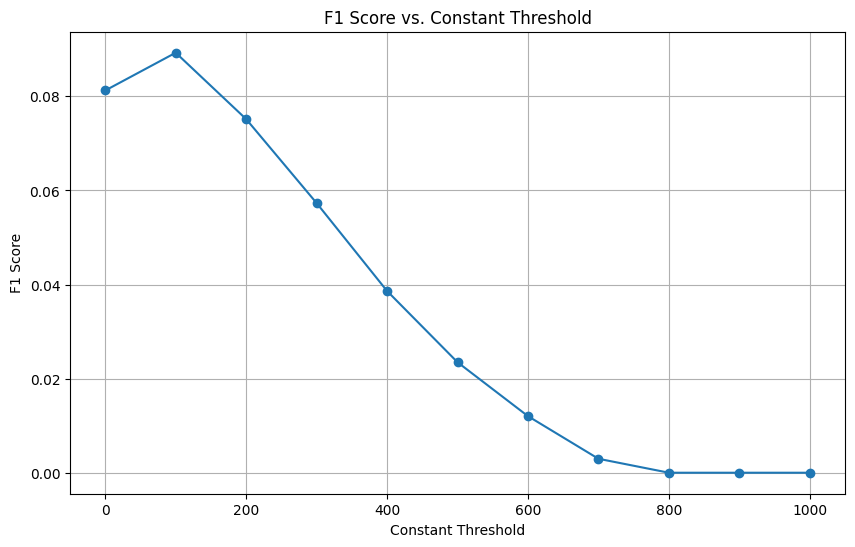

In [83]:
# prompt: draw a diagram that changes values of constant threshold between 0 and 1000 and f1 score on y axis

import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# ... (your existing code to load and preprocess the data) ...

f1_scores = []
thresholds = []

for threshold in range(0, 1001, 100):
    df2['generated_threshold_value'] = threshold
    df2['generated_label'] = np.where(df2['score'] >= df2['generated_threshold_value'], 1, 0)
    f1 = f1_score(df2['label'], df2['generated_label'], zero_division=1) #Handle cases where true positives and false positives are zero
    print(f"Threshold value : {threshold}")
    f1_scores.append(f1)
    thresholds.append(threshold)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-')
plt.xlabel("Constant Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. Constant Threshold")
plt.grid(True)
plt.show()


Threshold value : 0
Threshold value : 10
Threshold value : 20
Threshold value : 30
Threshold value : 40
Threshold value : 50
Threshold value : 60
Threshold value : 70
Threshold value : 80
Threshold value : 90
Threshold value : 100
Threshold value : 110
Threshold value : 120
Threshold value : 130
Threshold value : 140
Threshold value : 150
Threshold value : 160
Threshold value : 170
Threshold value : 180
Threshold value : 190
Threshold value : 200


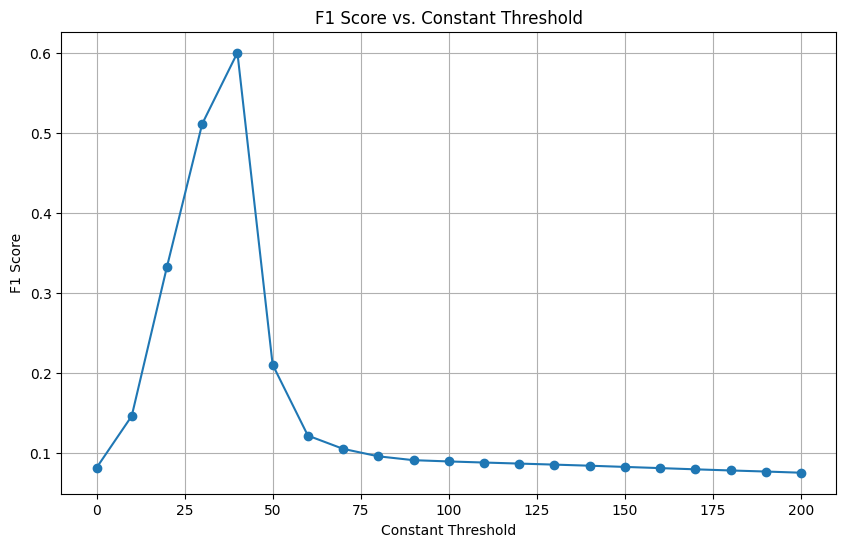

In [84]:
# prompt: draw a diagram that changes values of constant threshold between 0 and 1000 and f1 score on y axis

import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# ... (your existing code to load and preprocess the data) ...

f1_scores = []
thresholds = []

for threshold in range(0, 201, 10):
    df2['generated_threshold_value'] = threshold
    df2['generated_label'] = np.where(df2['score'] >= df2['generated_threshold_value'], 1, 0)
    f1 = f1_score(df2['label'], df2['generated_label'], zero_division=1) #Handle cases where true positives and false positives are zero
    print(f"Threshold value : {threshold}")
    f1_scores.append(f1)
    thresholds.append(threshold)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-')
plt.xlabel("Constant Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. Constant Threshold")
plt.grid(True)
plt.show()


Threshold value : 10
Threshold value : 11
Threshold value : 12
Threshold value : 13
Threshold value : 14
Threshold value : 15
Threshold value : 16
Threshold value : 17
Threshold value : 18
Threshold value : 19
Threshold value : 20
Threshold value : 21
Threshold value : 22
Threshold value : 23
Threshold value : 24
Threshold value : 25
Threshold value : 26
Threshold value : 27
Threshold value : 28
Threshold value : 29
Threshold value : 30
Threshold value : 31
Threshold value : 32
Threshold value : 33
Threshold value : 34
Threshold value : 35
Threshold value : 36
Threshold value : 37
Threshold value : 38
Threshold value : 39
Threshold value : 40
Threshold value : 41
Threshold value : 42
Threshold value : 43
Threshold value : 44
Threshold value : 45
Threshold value : 46
Threshold value : 47
Threshold value : 48
Threshold value : 49
Threshold value : 50


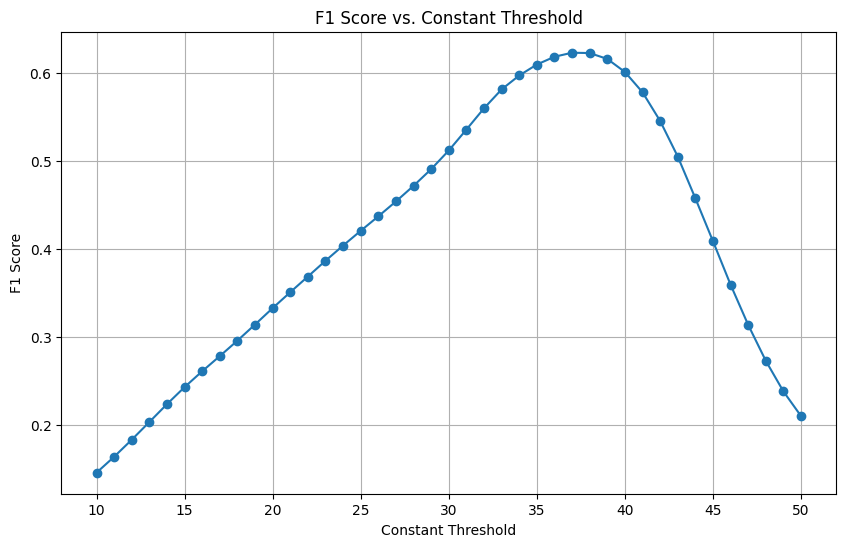

In [85]:
# prompt: draw a diagram that changes values of constant threshold between 0 and 1000 and f1 score on y axis

import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# ... (your existing code to load and preprocess the data) ...

f1_scores = []
thresholds = []

for threshold in range(10, 51, 1):
    df2['generated_threshold_value'] = threshold
    df2['generated_label'] = np.where(df2['score'] >= df2['generated_threshold_value'], 1, 0)
    f1 = f1_score(df2['label'], df2['generated_label'], zero_division=1) #Handle cases where true positives and false positives are zero
    print(f"Threshold value : {threshold}")
    f1_scores.append(f1)
    thresholds.append(threshold)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-')
plt.xlabel("Constant Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. Constant Threshold")
plt.grid(True)
plt.show()


Threshold value : 30.00 , F1 score : 0.5116
Threshold value : 31.00 , F1 score : 0.5353
Threshold value : 32.00 , F1 score : 0.5595
Threshold value : 33.00 , F1 score : 0.5809
Threshold value : 34.00 , F1 score : 0.5967
Threshold value : 35.00 , F1 score : 0.6091
Threshold value : 36.00 , F1 score : 0.6179
Threshold value : 37.00 , F1 score : 0.6225
Threshold value : 38.00 , F1 score : 0.6221
Threshold value : 39.00 , F1 score : 0.6155
Threshold value : 40.00 , F1 score : 0.6007


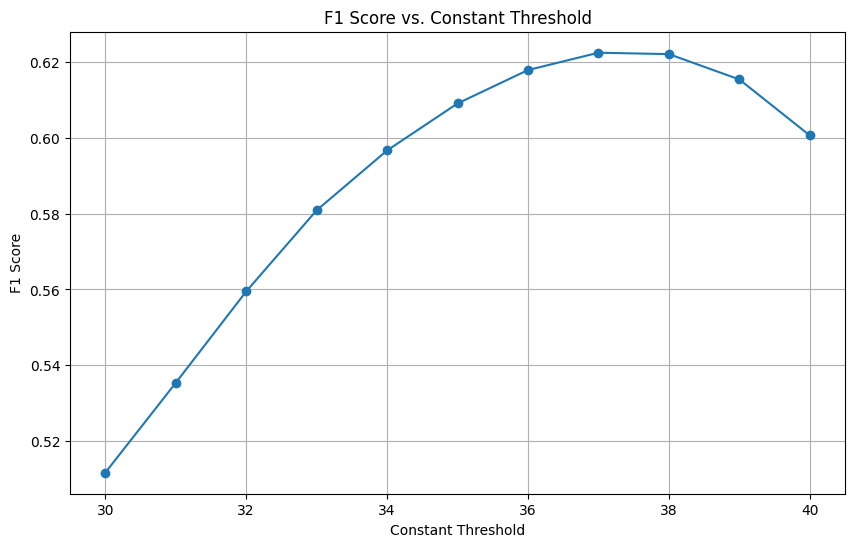

In [89]:
# prompt: draw a diagram that changes values of constant threshold between 0 and 1000 and f1 score on y axis

import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# ... (your existing code to load and preprocess the data) ...

f1_scores = []
thresholds = []

for threshold in range(30, 41, 1):
    df2['generated_threshold_value'] = threshold
    df2['generated_label'] = np.where(df2['score'] >= df2['generated_threshold_value'], 1, 0)
    f1 = f1_score(df2['label'], df2['generated_label'], zero_division=1) #Handle cases where true positives and false positives are zero
    print(f"Threshold value : {threshold:0.2f} , F1 score : {f1:0.4f}")
    f1_scores.append(f1)
    thresholds.append(threshold)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-')
plt.xlabel("Constant Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. Constant Threshold")
plt.grid(True)
plt.show()


## Dynamic threshold for ISCX


I think this equation is a good starting point for a hueristic function for the threshold

$a*sum^2+b*sum+c+\sqrt{sum}+d$

and in the following cells I will include numerical analysis for different values of a,b,c,d

a=0.0,b=0,c=0,d=0 F1 Score: 0.08125044817520546
a=0.05,b=0,c=0,d=0 F1 Score: 4.256224728665674e-05
a=0.1,b=0,c=0,d=0 F1 Score: 4.304778303917348e-05
a=0.15000000000000002,b=0,c=0,d=0 F1 Score: 4.3048709614929295e-05
a=0.2,b=0,c=0,d=0 F1 Score: 4.3048709614929295e-05
a=0.25,b=0,c=0,d=0 F1 Score: 4.3048709614929295e-05
a=0.30000000000000004,b=0,c=0,d=0 F1 Score: 4.3049636230573854e-05
a=0.35000000000000003,b=0,c=0,d=0 F1 Score: 4.3049636230573854e-05
a=0.4,b=0,c=0,d=0 F1 Score: 4.3049636230573854e-05
a=0.45,b=0,c=0,d=0 F1 Score: 4.3049636230573854e-05
a=0.5,b=0,c=0,d=0 F1 Score: 4.3049636230573854e-05
a=0.55,b=0,c=0,d=0 F1 Score: 4.3049636230573854e-05
a=0.6000000000000001,b=0,c=0,d=0 F1 Score: 4.3049636230573854e-05
a=0.65,b=0,c=0,d=0 F1 Score: 4.3049636230573854e-05
a=0.7000000000000001,b=0,c=0,d=0 F1 Score: 4.3049636230573854e-05
a=0.75,b=0,c=0,d=0 F1 Score: 4.3049636230573854e-05
a=0.8,b=0,c=0,d=0 F1 Score: 4.3049636230573854e-05
a=0.8500000000000001,b=0,c=0,d=0 F1 Score: 4.304963623

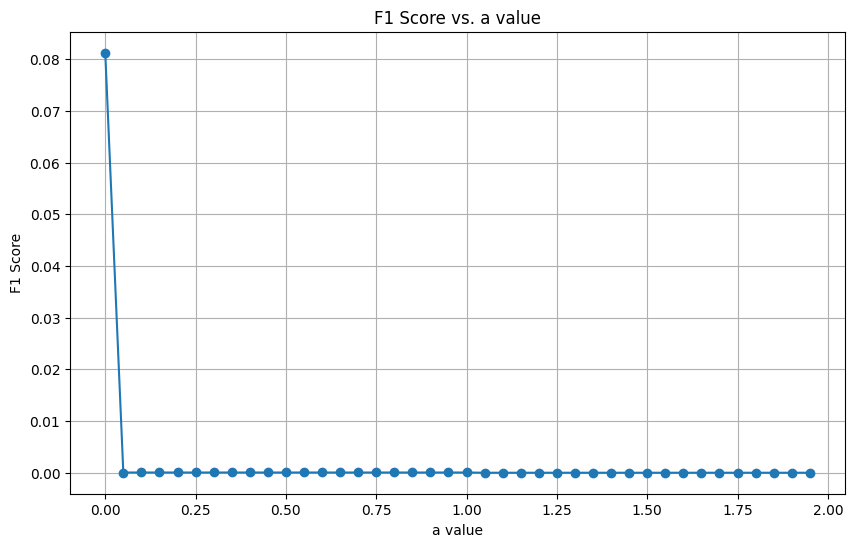

In [10]:
# prompt: I want to calculate generated_threshold_value by a*sum^2+b*sum+c*sqrt(sum)+d after that I want to to generate generated_label if the score is generated_threshold_value greater thatn


import matplotlib.pyplot as plt


thresholds = []
f1_scores = []

for i in np.arange(0, 2, 0.05):
  # Define coefficients for the threshold calculation
  a = i    # Example value, adjust as needed
  b = 0    # Example value, adjust as needed
  c = 0    # Example value, adjust as needed
  d = 0   # Example value, adjust as needed
  print(f"a={a},b={b},c={c},d={d}",end=' ')

  # Calculate generated_threshold_value
  df2['generated_threshold_value'] = (a * (df2['sum']**2)) + (b * df2['sum']) + (c * np.sqrt(df2['sum'])) + d


  # Generate labels based on the calculated threshold
  df2['generated_label'] = np.where(df2['score'] >= df2['generated_threshold_value'], 1, 0)

  # Calculate the F1-score
  f1 = f1_score(df2['label'], df2['generated_label'], zero_division=1)

  thresholds.append(a)
  f1_scores.append(f1)

  print(f"F1 Score: {f1}")


plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-')
plt.xlabel("a value")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. a value")
plt.grid(True)
plt.show()

a=0,b=-1.0,c=0,d=0 F1 Score: 0.08125044817520546
a=0,b=-0.75,c=0,d=0 F1 Score: 0.08125044817520546
a=0,b=-0.5,c=0,d=0 F1 Score: 0.08125044817520546
a=0,b=-0.25,c=0,d=0 F1 Score: 0.08125044817520546
a=0,b=0.0,c=0,d=0 F1 Score: 0.08125044817520546
a=0,b=0.25,c=0,d=0 F1 Score: 0.21943745461686356
a=0,b=0.5,c=0,d=0 F1 Score: 0.13496418046337783
a=0,b=0.75,c=0,d=0 F1 Score: 0.07741192080729076
a=0,b=1.0,c=0,d=0 F1 Score: 4.3033889187735344e-05
a=0,b=1.25,c=0,d=0 F1 Score: 0.0
a=0,b=1.5,c=0,d=0 F1 Score: 0.0
a=0,b=1.75,c=0,d=0 F1 Score: 0.0
a=0,b=2.0,c=0,d=0 F1 Score: 0.0
a=0,b=2.25,c=0,d=0 F1 Score: 0.0
a=0,b=2.5,c=0,d=0 F1 Score: 0.0
a=0,b=2.75,c=0,d=0 F1 Score: 0.0


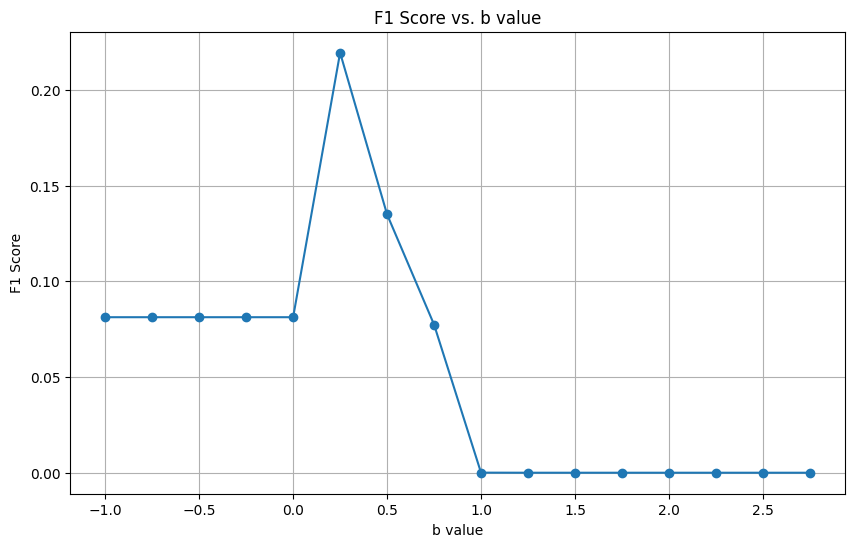

In [12]:
# prompt: I want to calculate generated_threshold_value by a*sum^2+b*sum+c*sqrt(sum)+d after that I want to to generate generated_label if the score is generated_threshold_value greater thatn


import matplotlib.pyplot as plt


thresholds = []
f1_scores = []

for i in np.arange(-1, 3, 0.25):
  # Define coefficients for the threshold calculation
  a = 0    # Example value, adjust as needed
  b = i    # Example value, adjust as needed
  c = 0    # Example value, adjust as needed
  d = 0   # Example value, adjust as needed
  print(f"a={a},b={b},c={c},d={d}",end=' ')

  # Calculate generated_threshold_value
  df2['generated_threshold_value'] = (a * (df2['sum']**2)) + (b * df2['sum']) + (c * np.sqrt(df2['sum'])) + d


  # Generate labels based on the calculated threshold
  df2['generated_label'] = np.where(df2['score'] >= df2['generated_threshold_value'], 1, 0)

  # Calculate the F1-score
  f1 = f1_score(df2['label'], df2['generated_label'], zero_division=1)

  thresholds.append(b)
  f1_scores.append(f1)

  print(f"F1 Score: {f1}")


plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-')
plt.xlabel("b value")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. b value")
plt.grid(True)
plt.show()

a=0,b=0.0,c=0,d=0 F1 Score: 0.08125044817520546
a=0,b=0.02,c=0,d=0 F1 Score: 0.08125044817520546
a=0,b=0.04,c=0,d=0 F1 Score: 0.08125044817520546
a=0,b=0.06,c=0,d=0 F1 Score: 0.08277045386110671
a=0,b=0.08,c=0,d=0 F1 Score: 0.09584627573803987
a=0,b=0.1,c=0,d=0 F1 Score: 0.11689368888349563
a=0,b=0.12,c=0,d=0 F1 Score: 0.14442918680987943
a=0,b=0.14,c=0,d=0 F1 Score: 0.17524340422282464
a=0,b=0.16,c=0,d=0 F1 Score: 0.21080737738049868
a=0,b=0.18,c=0,d=0 F1 Score: 0.2469422265515977
a=0,b=0.2,c=0,d=0 F1 Score: 0.2743523037288822
a=0,b=0.22,c=0,d=0 F1 Score: 0.2747304197697046
a=0,b=0.24,c=0,d=0 F1 Score: 0.24565393851253087
a=0,b=0.26,c=0,d=0 F1 Score: 0.19341234067862426
a=0,b=0.28,c=0,d=0 F1 Score: 0.14249456127628715
a=0,b=0.3,c=0,d=0 F1 Score: 0.10666717819851272
a=0,b=0.32,c=0,d=0 F1 Score: 0.10743952149490818
a=0,b=0.34,c=0,d=0 F1 Score: 0.11451094757467363
a=0,b=0.36,c=0,d=0 F1 Score: 0.12147651006711409
a=0,b=0.38,c=0,d=0 F1 Score: 0.12838665879054512
a=0,b=0.4,c=0,d=0 F1 Score:

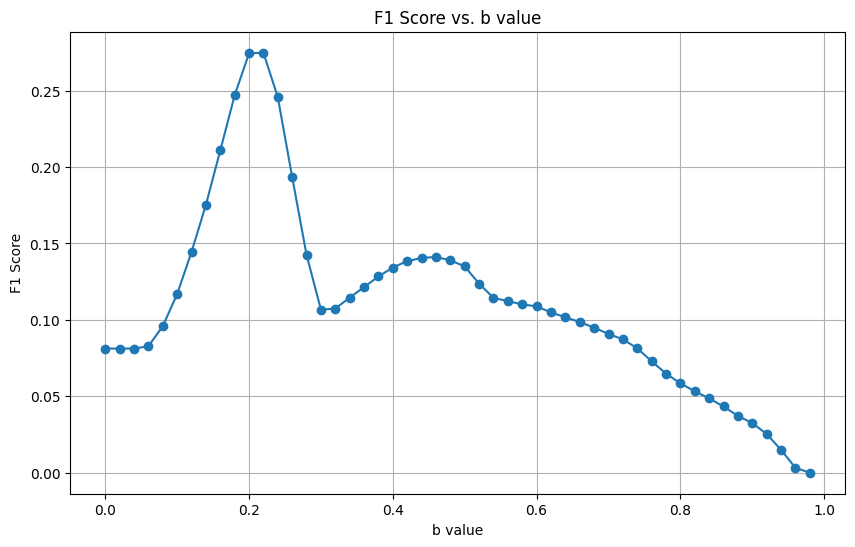

In [13]:
# prompt: I want to calculate generated_threshold_value by a*sum^2+b*sum+c*sqrt(sum)+d after that I want to to generate generated_label if the score is generated_threshold_value greater thatn


import matplotlib.pyplot as plt


thresholds = []
f1_scores = []

for i in np.arange(0, 1, 0.02):
  # Define coefficients for the threshold calculation
  a = 0    # Example value, adjust as needed
  b = i    # Example value, adjust as needed
  c = 0    # Example value, adjust as needed
  d = 0   # Example value, adjust as needed
  print(f"a={a},b={b},c={c},d={d}",end=' ')

  # Calculate generated_threshold_value
  df2['generated_threshold_value'] = (a * (df2['sum']**2)) + (b * df2['sum']) + (c * np.sqrt(df2['sum'])) + d


  # Generate labels based on the calculated threshold
  df2['generated_label'] = np.where(df2['score'] >= df2['generated_threshold_value'], 1, 0)

  # Calculate the F1-score
  f1 = f1_score(df2['label'], df2['generated_label'], zero_division=1)

  thresholds.append(b)
  f1_scores.append(f1)

  print(f"F1 Score: {f1}")


plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-')
plt.xlabel("b value")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. b value")
plt.grid(True)
plt.show()

a=0,b=0,c=0.0,d=0 F1 Score: 0.08125044817520546
a=0,b=0,c=0.5,d=0 F1 Score: 0.08384077143854407
a=0,b=0,c=1.0,d=0 F1 Score: 0.1369089919746901
a=0,b=0,c=1.5,d=0 F1 Score: 0.2308938412160116
a=0,b=0,c=2.0,d=0 F1 Score: 0.3266033725583594
a=0,b=0,c=2.5,d=0 F1 Score: 0.4277136796734313
a=0,b=0,c=3.0,d=0 F1 Score: 0.4527576192672769
a=0,b=0,c=3.5,d=0 F1 Score: 0.27412470358487934
a=0,b=0,c=4.0,d=0 F1 Score: 0.13602152449359362
a=0,b=0,c=4.5,d=0 F1 Score: 0.1404316238744464
a=0,b=0,c=5.0,d=0 F1 Score: 0.1473850566302789
a=0,b=0,c=5.5,d=0 F1 Score: 0.14968031904792048
a=0,b=0,c=6.0,d=0 F1 Score: 0.13791412647303988
a=0,b=0,c=6.5,d=0 F1 Score: 0.12199197860962567
a=0,b=0,c=7.0,d=0 F1 Score: 0.10521462964860158
a=0,b=0,c=7.5,d=0 F1 Score: 0.09429626018524967
a=0,b=0,c=8.0,d=0 F1 Score: 0.08968784247180683
a=0,b=0,c=8.5,d=0 F1 Score: 0.08794776651919509
a=0,b=0,c=9.0,d=0 F1 Score: 0.08639775365840488
a=0,b=0,c=9.5,d=0 F1 Score: 0.08481671580939901
a=0,b=0,c=10.0,d=0 F1 Score: 0.0831645243269124

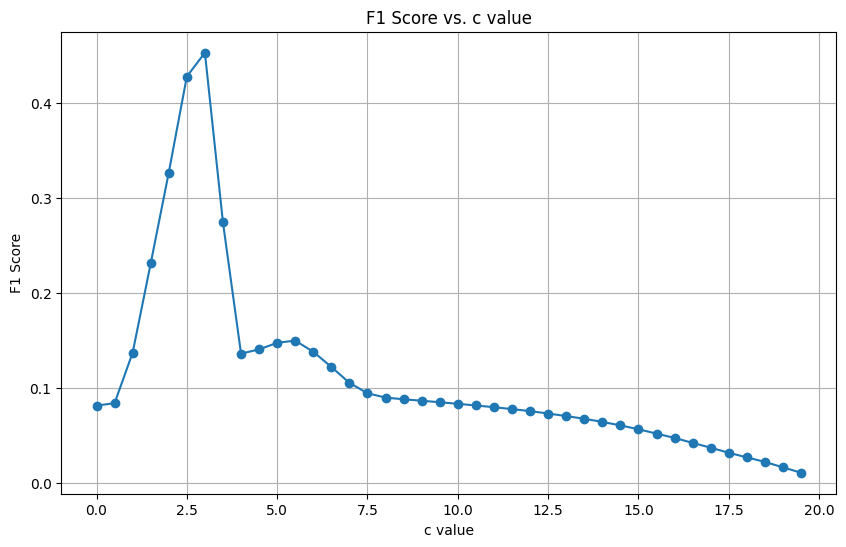

In [14]:
# prompt: I want to calculate generated_threshold_value by a*sum^2+b*sum+c*sqrt(sum)+d after that I want to to generate generated_label if the score is generated_threshold_value greater thatn


import matplotlib.pyplot as plt


thresholds = []
f1_scores = []

for i in np.arange(0, 20, 0.5):
  # Define coefficients for the threshold calculation
  a = 0    # Example value, adjust as needed
  b = 0    # Example value, adjust as needed
  c = i    # Example value, adjust as needed
  d = 0   # Example value, adjust as needed
  print(f"a={a},b={b},c={c},d={d}",end=' ')

  # Calculate generated_threshold_value
  df2['generated_threshold_value'] = (a * (df2['sum']**2)) + (b * df2['sum']) + (c * np.sqrt(df2['sum'])) + d


  # Generate labels based on the calculated threshold
  df2['generated_label'] = np.where(df2['score'] >= df2['generated_threshold_value'], 1, 0)

  # Calculate the F1-score
  f1 = f1_score(df2['label'], df2['generated_label'], zero_division=1)

  thresholds.append(c)
  f1_scores.append(f1)

  print(f"F1 Score: {f1}")


plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-')
plt.xlabel("c value")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. c value")
plt.grid(True)
plt.show()

a=0,b=0,c=0.0,d=0 F1 Score: 0.08125044817520546
a=0,b=0,c=0.05,d=0 F1 Score: 0.08125044817520546
a=0,b=0,c=0.1,d=0 F1 Score: 0.08125044817520546
a=0,b=0,c=0.15000000000000002,d=0 F1 Score: 0.08125044817520546
a=0,b=0,c=0.2,d=0 F1 Score: 0.08125044817520546
a=0,b=0,c=0.25,d=0 F1 Score: 0.08125151397756558
a=0,b=0,c=0.30000000000000004,d=0 F1 Score: 0.08128214998075375
a=0,b=0,c=0.35000000000000003,d=0 F1 Score: 0.0814644233315736
a=0,b=0,c=0.4,d=0 F1 Score: 0.08190316877177009
a=0,b=0,c=0.45,d=0 F1 Score: 0.08269225798458567
a=0,b=0,c=0.5,d=0 F1 Score: 0.08384077143854407
a=0,b=0,c=0.55,d=0 F1 Score: 0.08530576124221749
a=0,b=0,c=0.6000000000000001,d=0 F1 Score: 0.08725744794407135
a=0,b=0,c=0.65,d=0 F1 Score: 0.08999967884368154
a=0,b=0,c=0.7000000000000001,d=0 F1 Score: 0.09382226761172484
a=0,b=0,c=0.75,d=0 F1 Score: 0.0988574187491235
a=0,b=0,c=0.8,d=0 F1 Score: 0.10510395942069257
a=0,b=0,c=0.8500000000000001,d=0 F1 Score: 0.11220464539201197
a=0,b=0,c=0.9,d=0 F1 Score: 0.120095718

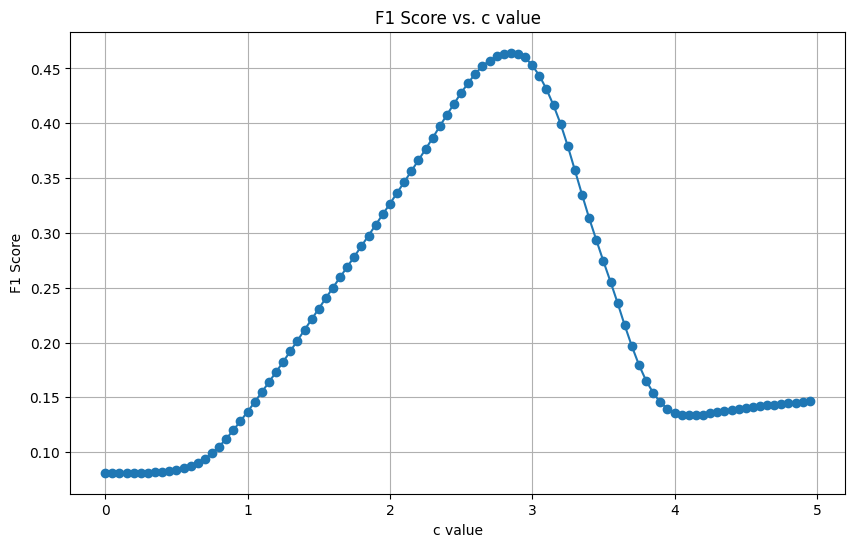

In [15]:
# prompt: I want to calculate generated_threshold_value by a*sum^2+b*sum+c*sqrt(sum)+d after that I want to to generate generated_label if the score is generated_threshold_value greater thatn


import matplotlib.pyplot as plt


thresholds = []
f1_scores = []

for i in np.arange(0, 5, 0.05):
  # Define coefficients for the threshold calculation
  a = 0    # Example value, adjust as needed
  b = 0    # Example value, adjust as needed
  c = i    # Example value, adjust as needed
  d = 0   # Example value, adjust as needed
  print(f"a={a},b={b},c={c},d={d}",end=' ')

  # Calculate generated_threshold_value
  df2['generated_threshold_value'] = (a * (df2['sum']**2)) + (b * df2['sum']) + (c * np.sqrt(df2['sum'])) + d


  # Generate labels based on the calculated threshold
  df2['generated_label'] = np.where(df2['score'] >= df2['generated_threshold_value'], 1, 0)

  # Calculate the F1-score
  f1 = f1_score(df2['label'], df2['generated_label'], zero_division=1)

  thresholds.append(c)
  f1_scores.append(f1)

  print(f"F1 Score: {f1}")


plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-')
plt.xlabel("c value")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. c value")
plt.grid(True)
plt.show()

a=0,b=0,c=0,d=0 F1 Score: 0.08125044817520546
a=0,b=0,c=0,d=1 F1 Score: 0.08125044817520546
a=0,b=0,c=0,d=2 F1 Score: 0.08206592862448273
a=0,b=0,c=0,d=3 F1 Score: 0.08492701770665327
a=0,b=0,c=0,d=4 F1 Score: 0.08883279714021794
a=0,b=0,c=0,d=5 F1 Score: 0.09364489451785024
a=0,b=0,c=0,d=6 F1 Score: 0.0994210774410048
a=0,b=0,c=0,d=7 F1 Score: 0.10680637992956317
a=0,b=0,c=0,d=8 F1 Score: 0.116833961616457
a=0,b=0,c=0,d=9 F1 Score: 0.13019542218566527
a=0,b=0,c=0,d=10 F1 Score: 0.14611301904464563
a=0,b=0,c=0,d=11 F1 Score: 0.1642057828977533
a=0,b=0,c=0,d=12 F1 Score: 0.18350858218670513
a=0,b=0,c=0,d=13 F1 Score: 0.2036072500833982
a=0,b=0,c=0,d=14 F1 Score: 0.22386897004497663
a=0,b=0,c=0,d=15 F1 Score: 0.24322024828767122
a=0,b=0,c=0,d=16 F1 Score: 0.26119104136318
a=0,b=0,c=0,d=17 F1 Score: 0.27840606830599385
a=0,b=0,c=0,d=18 F1 Score: 0.2959301876592787
a=0,b=0,c=0,d=19 F1 Score: 0.3141958599297782
a=0,b=0,c=0,d=20 F1 Score: 0.33280567727331817
a=0,b=0,c=0,d=21 F1 Score: 0.3508

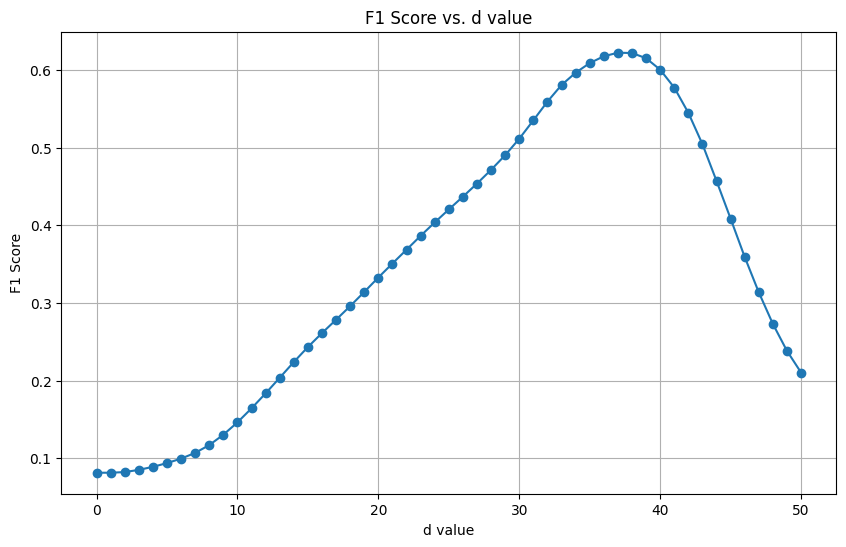

In [16]:
# prompt: I want to calculate generated_threshold_value by a*sum^2+b*sum+c*sqrt(sum)+d after that I want to to generate generated_label if the score is generated_threshold_value greater thatn


import matplotlib.pyplot as plt


thresholds = []
f1_scores = []

for i in np.arange(0, 51, 1):
  # Define coefficients for the threshold calculation
  a = 0    # Example value, adjust as needed
  b = 0    # Example value, adjust as needed
  c = 0    # Example value, adjust as needed
  d = i   # Example value, adjust as needed
  print(f"a={a},b={b},c={c},d={d}",end=' ')

  # Calculate generated_threshold_value
  df2['generated_threshold_value'] = (a * (df2['sum']**2)) + (b * df2['sum']) + (c * np.sqrt(df2['sum'])) + d


  # Generate labels based on the calculated threshold
  df2['generated_label'] = np.where(df2['score'] >= df2['generated_threshold_value'], 1, 0)

  # Calculate the F1-score
  f1 = f1_score(df2['label'], df2['generated_label'], zero_division=1)

  thresholds.append(d)
  f1_scores.append(f1)

  print(f"F1 Score: {f1}")


plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-')
plt.xlabel("d value")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. d value")
plt.grid(True)
plt.show()

So try sum of all values divide by 3 to generate an item with combination of values.


Lets try some values in the following cells

In [18]:
a = 0
b = 0
c = 0
d = 37

print(f"a={a},b={b},c={c},d={d}",end=' ')
df2['generated_threshold_value'] = (a * (df2['sum']**2)) + (b * df2['sum']) + (c * np.sqrt(df2['sum'])) + d
df2['generated_label'] = np.where(df2['score'] >= df2['generated_threshold_value'], 1, 0)
f1 = f1_score(df2['label'], df2['generated_label'], zero_division=1)
print(f"F1 Score: {f1}")

a=0,b=0,c=0,d=37 F1 Score: 0.6225078400467966


In [19]:
a = 0
b = 0
c = 2.9
d = 0

print(f"a={a},b={b},c={c},d={d}",end=' ')
df2['generated_threshold_value'] = (a * (df2['sum']**2)) + (b * df2['sum']) + (c * np.sqrt(df2['sum'])) + d
df2['generated_label'] = np.where(df2['score'] >= df2['generated_threshold_value'], 1, 0)
f1 = f1_score(df2['label'], df2['generated_label'], zero_division=1)
print(f"F1 Score: {f1}")

a=0,b=0,c=2.9,d=0 F1 Score: 0.4633251833740831
